##  <center> Logistic Regression Assignment

#### Problem Statement:
<code style="background:lightblue;color:black">To predict whether the client will subscribe a term deposit or not.</code>


In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file and having a glance at it
bank_data = pd.read_csv('bank-full.csv', sep= ';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Making the necessary EDA for the model

In [3]:
#Looking at the rows and columns of the data
bank_data.shape

(45211, 17)

In [4]:
#Checking the datatypes and null values if present any
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


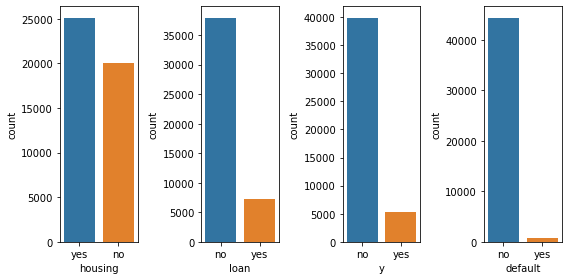

In [5]:
#sns.set_style('ticks')
fig,ax=plt.subplots(1,4)
sns.countplot(x='housing',data=bank_data,ax=ax[0])
sns.countplot(x='loan',data=bank_data,ax=ax[1])
sns.countplot(x='y',data=bank_data,ax=ax[2])
sns.countplot(x='default',data=bank_data,ax=ax[3])
fig.set_size_inches(8, 4)
plt.tight_layout()
fig.show()

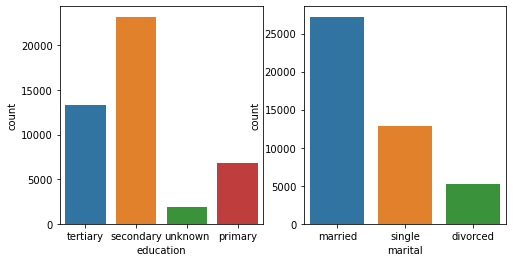

<Figure size 432x216 with 0 Axes>

In [6]:
fig,ax=plt.subplots(1,2)
plt.figure(figsize=(6,3))
sns.countplot(x = 'education',data = bank_data,ax=ax[0] )
sns.countplot(x = 'marital',data = bank_data,ax=ax[1] )
fig.set_size_inches(8, 4)
plt.tight_layout()

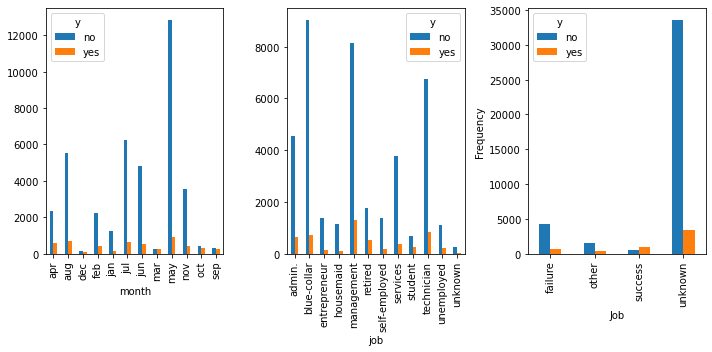

In [7]:
fig,ax=plt.subplots(1,3)
pd.crosstab(bank_data.month,bank_data.y).plot(kind='bar',ax=ax[0])
pd.crosstab(bank_data.job,bank_data.y).plot(kind='bar',ax=ax[1])
pd.crosstab(bank_data.poutcome,bank_data.y).plot(kind='bar',ax=ax[2])
plt.xlabel('Job')
plt.ylabel('Frequency')
fig.set_size_inches(10, 5)
plt.tight_layout()

In [8]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
bank_data.drop(["month","education","pdays","day","campaign","age",'loan',"housing",'marital'],axis=1,inplace=True)

In [10]:
bank_data.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


In [11]:
#Creating dummy variable for categorical data
contactd=pd.get_dummies(bank_data['contact'],drop_first=True)
jobd=pd.get_dummies(bank_data['job'],drop_first=True)
poutcomed=pd.get_dummies(bank_data['poutcome'],drop_first=True)
defaultd = pd.get_dummies(bank_data['default'],drop_first=True)

In [12]:
bank_data = pd.concat([bank_data,defaultd,poutcomed,jobd,contactd],axis=1)
bank_data.head()

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,0,0,0,0,1,0,1


In [13]:
#Dropping the categorical column, for which we had just cerated dummy variables
bank_data.drop(['default','poutcome','job',"contact"],axis=1,inplace = True)
bank_data.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [14]:
bank_new= bank_data.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#Assigning the independent and dependent values
X = bank_data.drop("y",axis=1)
Y = bank_data["y"]

In [16]:
#Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [17]:
#Predicting for the built model
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob

array([[0.97641491, 0.02358509],
       [0.98507658, 0.01492342],
       [0.99002661, 0.00997339],
       ...,
       [0.00853618, 0.99146382],
       [0.8822719 , 0.1177281 ],
       [0.87909981, 0.12090019]])

In [18]:
#Evaluating metrics to identify the missclassified classes using confusion matrix and finding the accuracy of the predicted model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix = confusion_matrix(Y,y_pred)
accuracy=accuracy_score(Y,y_pred)
print (cm,accuracy)

[[39005   917]
 [ 3605  1684]] 0.8999800933401163


In [19]:
#Checking the accuracy of the model
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



#### ROC Curve

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
  
y_predict= label_encoder.fit_transform(y_pred) 

y_actual= label_encoder.fit_transform(bank_new['y']) 

Text(0, 0.5, 'True Positive Rate')

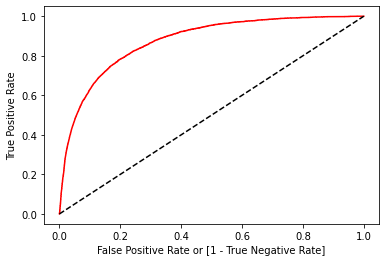

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [22]:
auc

0.6477134406230929

#### Insights drawn:
>From the ROC curve, it is evident that, the area under curve is 64.77%, it can be used to predict the true positive rate.Also the created model gives 90% accurate prediction for the client to subscribe the term deposit.